<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Árboles de Decisión
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Melani Loor &bull; 2024-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [ ]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

**Carga de datos**

In [ ]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/mnloor/Aprendizaje-Automatico/refs/heads/main/Datos/diabetes.csv')

data.rename(columns={
    "Pregnancies": "Embarazos",
    "Glucose": "Glucosa",
    "BloodPressure": "Presión_Arterial",
    "SkinThickness": "Grosor_de_Piel",
    "Insulin": "Insulina",
    "BMI": "IMC",
    "DiabetesPedigreeFunction": "Funcion_Hereditaria_Diabetes",
    "Age": "Edad",
    "Outcome": "Resultado"
}, inplace=True)


# Verificar nombres de columnas
data.columns

# Tomo las columnas de interés
numeric_cols = ['Embarazos', 'Glucosa', 'Presión_Arterial', 'Grosor_de_Piel', 'Insulina','IMC','Funcion_Hereditaria_Diabetes','Edad']
class_col = ['Resultado']


# Muestro los primeros registros
display(data.head())

,Embarazos,Glucosa,Presión_Arterial,Grosor_de_Piel,Insulina,IMC,Funcion_Hereditaria_Diabetes,Edad,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Descripción de los datos**

In [ ]:
data.describe()

,Embarazos,Glucosa,Presión_Arterial,Grosor_de_Piel,Insulina,IMC,Funcion_Hereditaria_Diabetes,Edad,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* En árboles de decisión no es necesario escalar los datos porque los valores de las variables no son relevantes para realizar los cálculos


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

**Entrenamiento del modelo**

In [ ]:
X = data[numeric_cols]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, data['Resultado'], test_size=0.2, random_state=42, stratify=data['Resultado'])

In [ ]:
# Crear y entrenar un arbol con ganancia de información
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=4)
modelo.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

Se entrenó el modelo con entropía y una profundidad máxima de 4 dado que se probaron varios modelos de forma manual y se encontró que con estos hiperparámetros se tiene la mejor precisión

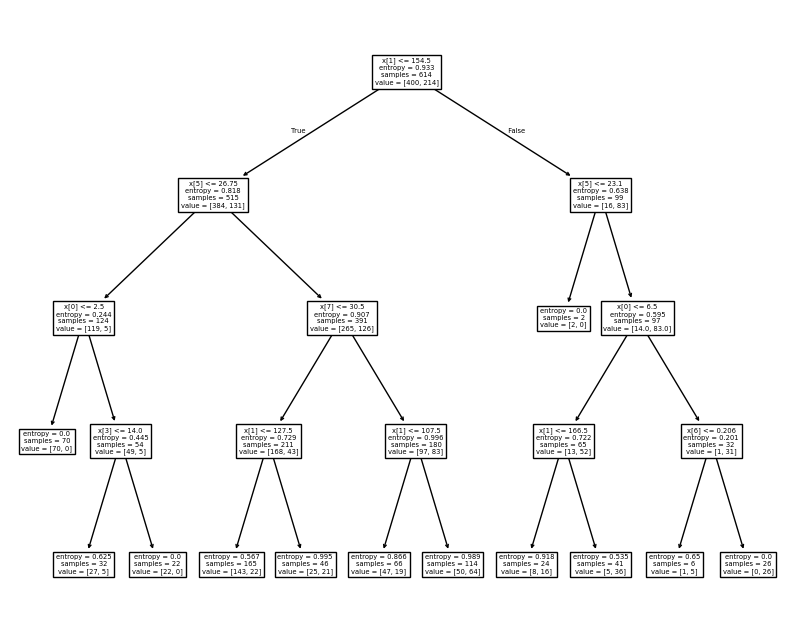

In [ ]:
# Visualizar el árbol
plt.figure(figsize=(10, 8))
plot_tree(modelo)
plt.show()

**Evaluacion del modelo**

In [ ]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.81
Matriz de confusión:
[[87 13]
 [17 37]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       100
           1       0.74      0.69      0.71        54

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



La precisión del modelo del 0.81 indica una precisión bastante buena ya que es muy cercana a 1 aunque lo ideal es que la precisión sea mayor a 0.90, pero 0.81 indica un buen modelo